# Introduction to K-means

### Objectives

- **Assess** what scenarios could use k-means

- **Articulate** the methodology used by k-means

- **Apply** KMeans from sklearn.cluster to a relevant dataset

- **Select** the appropriate number of clusters using k-means and the elbow method

- **Evaluate** the weaknesses and remedies to k-means

## Scenario

>You work for the marketing department within large company that manages a customer base. 
For each customer you have a record of average purchase cost and time since last purchase.<br> 
You know that if you want to retain your customers you cannot treat them the same. You can use targeted marketing ads towards groups that demonstrate different behavior, but how will you divide the customers into groups?

## **Part 1**: Concept introduction
#### Import libraries and download dataset

We are continuing to use Scikit Learn as our main library.
The specific documentation for [k-means can be found here](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).

![img](http://drive.google.com/uc?export=view&id=12uOIWDlAk5YRgy9FOALfUlK0fVt5JTvH)

In [21]:
# Required packages for today
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn import datasets
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

# Familiar packages for plotting, data manipulation, and numeric functions
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# import my own code for the demo clusters
from demo_images import *

# Have plots appear in notebook
%matplotlib inline

# Default plot params
plt.style.use('seaborn')
cmap = 'tab10'

## Clustering!   Finding **GROUPS**

How many groups do you see?

<img src="img/initialscenario.png" width=600>


## Wait, how is clustering different from classification?

>In _classification_ you **know** what groups are in the dataset and the goal is to _**predict**_ class membership.

>In _clustering_ you **do not** know which groups are in the dataset and you are trying to _**identify**_ the groups.

### So what do you do with clustering results?

Clustering is often an *informing* step in your analysis. Once clusters are identified, one can:
- Create strategies on how to approach each group differently
- Use cluster membership as an independent variable in a predictive model
- Use the clusters as the _**target label**_ in future classification models. How would you assign new data to the existing clusters?

## Explore the algorithm with an intuitive K means approach

### Observe the following four methods with a sample dataset:

### Method Questions:

- What do they have in common?
- What are the differences between them?
- How many groups are there in the end?
- Do you see any problems with this method?

#### Method 1

![left](img/from-left.gif)

#### Method 2

![right](img/from-right.gif)

#### Method 3

![top](img/from-top.gif)

#### Method 4

![bottom](img/from-bottom.gif)

### Review Method Questions:

- What do they have in common?
- What are the differences between them?
- How many groups are there in the end?
- Do you see any problems with this method?

In common:
- Green dots starts at points
- Calculates distance
- Moves dots
- Re-measures distance
- Moves dots as needed


Differences:
- Dots start in different places and groups settle in different places

Groups: 4

Problem with this method? too variable

#### Is four the best **k** for this data?

<img src="img/kmeans4.png" width=850>

### K-means algorithm, at its core, in an optimization function

<img src="img/minmaxdata.png" width=400>

### Reassigns groups and adjusts centroids to...
<img src="img/min.png" width=700>

### And to...
<img src="img/max.png" width=750>

> The **scikit-learn** documentation actually has some pretty good [descriptions of the algorithm](https://scikit-learn.org/stable/modules/clustering.html#k-mean) if you want more detail.

#### Data for the exercise

- This is a sample dataset. 
- Let us assume the data is already scaled.

In [3]:
dummy_dat = pd.read_csv("xclara.txt",header=0,index_col=0)

In [4]:
dummy_dat.head()

,V1,V2
1,2.072345,-3.241693
2,17.936710,15.784810
3,1.083576,7.319176
4,11.120670,14.406780
5,23.711550,2.557729


## EDA of variables

In [5]:
dummy_dat.describe()

,V1,V2
count,3000.000000,3000.000000
mean,40.611358,22.862141
std,25.859054,31.759714
min,-22.495990,-38.795500
25%,18.462790,-4.003494
50%,41.552210,13.827390
75%,62.249480,55.729100
max,104.376600,87.313700


## Implementting `Kmeans` with scikit-learn

In [6]:
model = KMeans(n_clusters=4).fit(dummy_dat)

In [7]:
model.cluster_centers_

array([[ 47.70578896,  58.96848521],
       [ 69.92418447, -10.11964119],
       [  9.45577774,  10.66209744],
       [ 31.36903327,  60.64929333]])

## Note! 
#### Do you have different cluster_centers?
*Good!*

We saw in the demo that the algorithm is sensitive to starting points.

We can use the additional argument `random_state` to set the seed and have a repeatable results

In [8]:
model_setseed = KMeans(n_clusters=4, random_state=10).fit(dummy_dat)
model_setseed.cluster_centers_

array([[ 48.09974943,  59.34612869],
       [ 69.92418447, -10.11964119],
       [  9.45577774,  10.66209744],
       [ 31.77135822,  60.10656849]])

#### **Exercise**: 
- Try running `Kmeans` with different number of `n_clusters`, k=2 through k=7
- Check the `cluster_centers_` 
- Without running any more functions, which number of K is the best?

In [9]:
#Practice code goes here
model5 = KMeans(n_clusters=5, random_state=10).fit(dummy_dat)
model5.cluster_centers_

array([[ 78.62132436,  -9.9770007 ],
       [  9.39317958,  10.68489975],
       [ 48.02195126,  59.32887199],
       [ 61.83031972, -10.20781682],
       [ 31.67711429,  60.13652232]])

## **Part 2**: Choosing the appropriate number of K

#### Two metrics we can use: **elbow method** and the **silhouette coefficient**

### **Part 2A**: Elbow Method

Elbow method uses the sum of squared error calculated from each instance of `k` to find the best value of `k`.
![inertia](img/inertia.png)

Sklearn refers to this value as the `inerta_` of the model.

Sometimes you will see the SSE divided by the total sum of squares in the dataset (how far is each point from the center of the entire dataset)

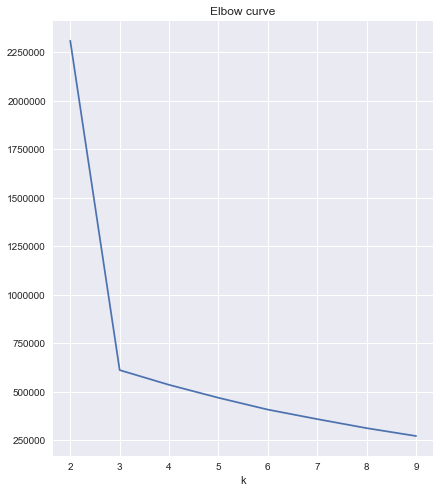

In [10]:
# Specifying the dataset and initializing variables
X = dummy_dat
distorsions = []

# Calculate SSE for different K
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state = 301)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

# Plot values of SSE
plt.figure(figsize=(15,8))
plt.subplot(121, title='Elbow curve')
plt.xlabel('k')
plt.plot(range(2, 10), distorsions)
plt.grid(True)


### **Part 2B**: Silhouette coefficient

![silo](img/silo2.png)

> **a** refers to the average distance between a point and all other points in that cluster.

> **b** refers to the average distance between that same point and all other points in clusters to which it does not belong

It is calculated for each point in the dataset, then averaged across all points for one cumulative score.

Silhouette coefficient ranges between 1 and -1. The closer to 1 the more clearly defined are the clusters. The closer to -1, the more incorrect assignment.





In [26]:
#function to generate silhouette plot from lecture

def silhouette_plot(n_clusters, cluster_labels, X):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

#     # Initialize the clusterer with n_clusters value and a random generator
#     # seed of 10 for reproducibility.
#     clusterer = KMeans(n_clusters=n_clusters, random_state=10)
#     cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_object)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_object)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
    plt.show()

In [1]:
#think about how to use the above function to generate silhouette plots for k=2 through 7
#code is at the end of the book if you get stuck

### Other graphs to look at when selecting k

In [11]:
# Generate silhouette coefficient for each k
X = dummy_dat
silhouette_plot = []
for k in range(2, 10):
    clusters = KMeans(n_clusters=k, random_state=10)
    cluster_labels = clusters.fit_predict(X)
    silhouette_avg = metrics.silhouette_score(X, cluster_labels)
    silhouette_plot.append(silhouette_avg)

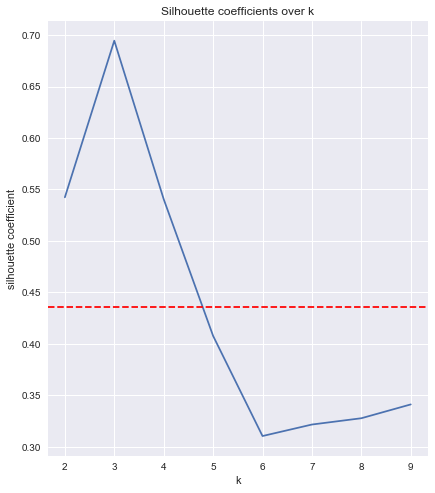

In [12]:
# Plot Silhouette coefficient
plt.figure(figsize=(15,8))
plt.subplot(121, title='Silhouette coefficients over k')
plt.xlabel('k')
plt.ylabel('silhouette coefficient')
plt.plot(range(2, 10), silhouette_plot)
plt.axhline(y=np.mean(silhouette_plot), color="red", linestyle="--")
plt.grid(True)

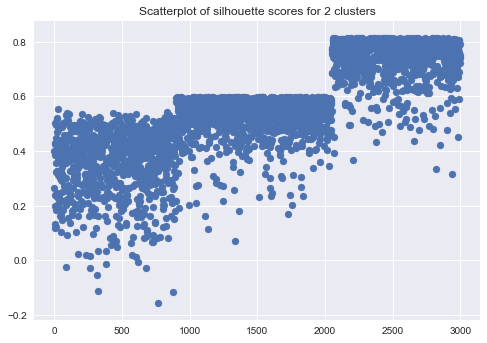

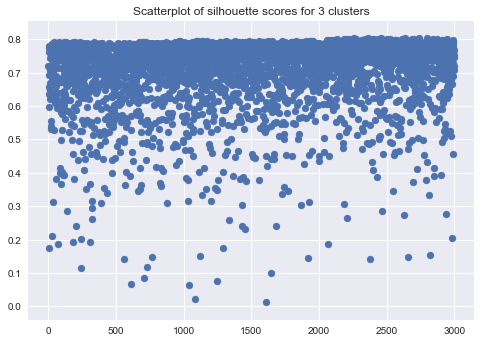

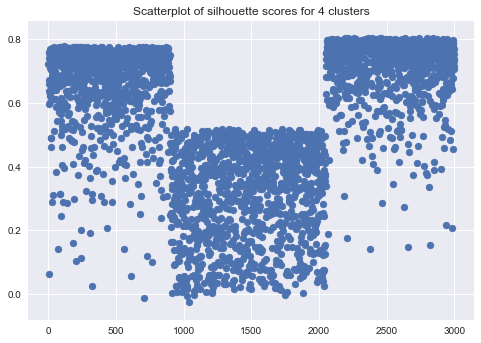

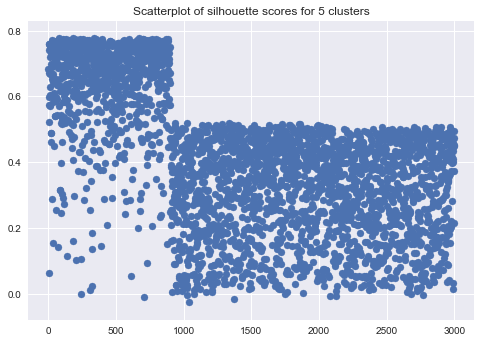

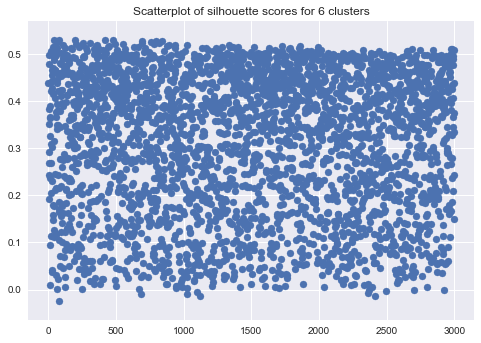

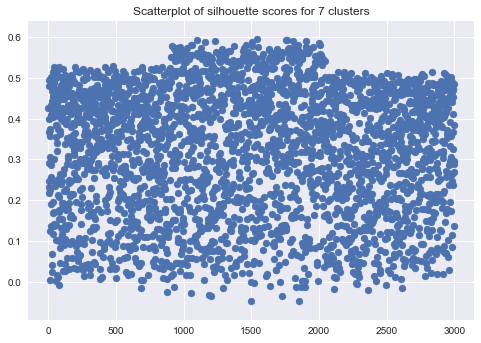

In [60]:
#scatterplot of silhouette scores
X = dummy_dat

for k in range(2,8):
    clusters = KMeans(n_clusters=k, random_state=10)
    cluster_labels = clusters.fit_predict(X)
    silhouette_avg = metrics.silhouette_score(X, cluster_labels)
    samples = silhouette_samples(X, cluster_labels)
    plt.scatter(range(0,len(samples)), samples)
    plt.title('Scatterplot of silhouette scores for {} clusters'
              .format(k)
             )
    plt.show()

#### What do the silhouette scores look like above?  
#### Compare the plot for k=3 and k=6.  Note how there appear to be no major breaks as in the other k's, but that
#### their silhouette scores are on avg closer to 1 in k=3 than k=6
#### (in other words, more of the dots are closer to 1)

### Rules to remember when selecting k:

![bestk](img/elbosilo.png)

## **Part 3**: **Assumptions** and **challenges** of K-means

- Demonstrate the ideal K-means dataset
- Show three scenarios where K-means struggles

#### Ideal K-means scenario

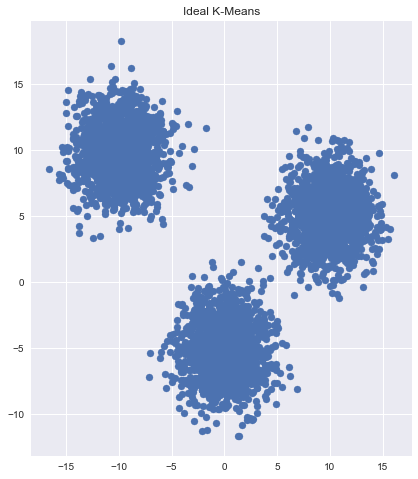

In [12]:
ideal()

#### Meets all assumptions:

- Independent variables
- Balanced cluster sizes
- Clusters have similar density
- Spherical clusters/equal variance of variables


#### Problem Scenario 1 - classes not all round

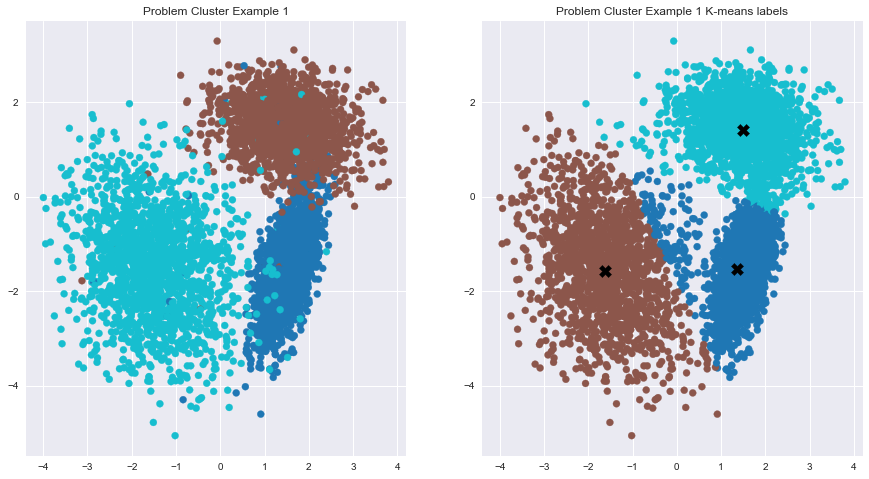

In [13]:
messyOne()

#### Problem Scenario 2 - imbalenced class size

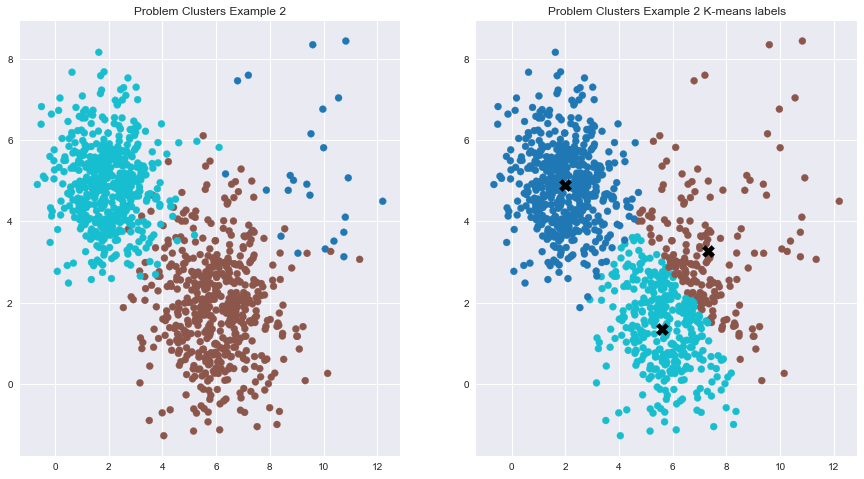

In [14]:
messyTwo()

#### Problem Scenario 3 - class size and density

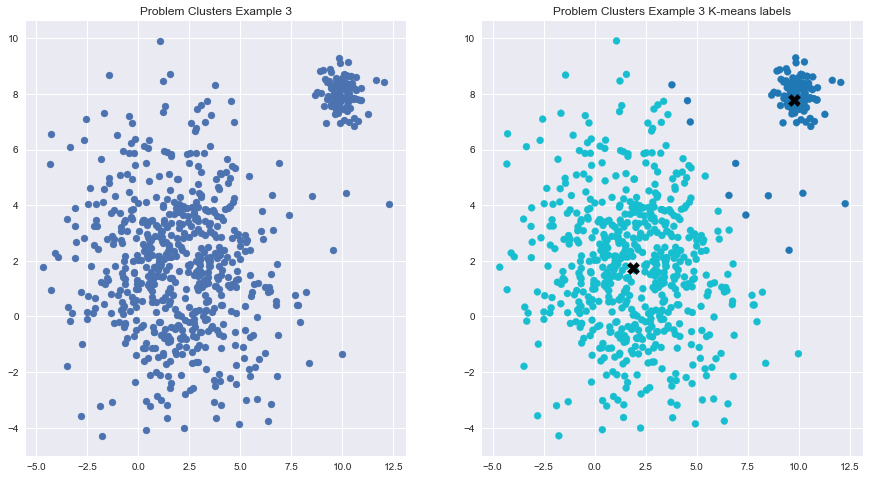

In [15]:
messyThree()

#### Solution to challenges:

- Preprocessing: PCA or scaling
- Try a different clustering method

## Exercise:
### K-means on larger dataset - Wine subscription

You want to run a wine subscription service, but you have no idea about wine tasting notes. You are a person of science.
You have a wine dataset of scientific measurements.
If you know a customer likes a certain wine in the dataset, can you recommend other wines to the customer in the same cluster?

![wine](https://images.pexels.com/photos/1097425/pexels-photo-1097425.jpeg?auto=compress&cs=tinysrgb&dpr=2&h=750&w=1260)

#### Questions:
- How many clusters are in the wine dataset?
- What are the characteristics of each clusters?
- What problems do you see potentially in the data?

the dataset is `Wine.csv`

Instructions:
- First, remove customer_segment from the dataset

In [33]:
# Work on problem here:
wine = pd.read_csv('Wine.csv')

2    71
1    59
3    48
Name: Customer_Segment, dtype: int64

In [16]:
wine.drop(columns=['Customer_Segment'], inplace=True)
wine.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### Review k-means steps
1. Look at and clean data (if needed)
2. Scale data
3. Try various values of k
4. Plot SSE and Silohuette coefficient to find best `k`
5. Describe the characteristics of each cluster using their centroids

### BUT

Let's say we aren't quite sure which scaler is the best to use for the data as well. Or, will the clustering be sensitive to what type of scaling we use?

Let us start demoing ways to look at that.

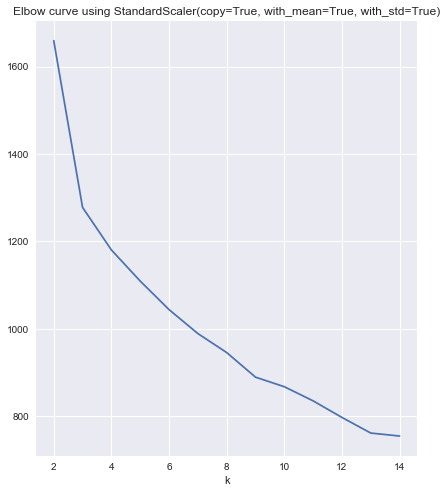

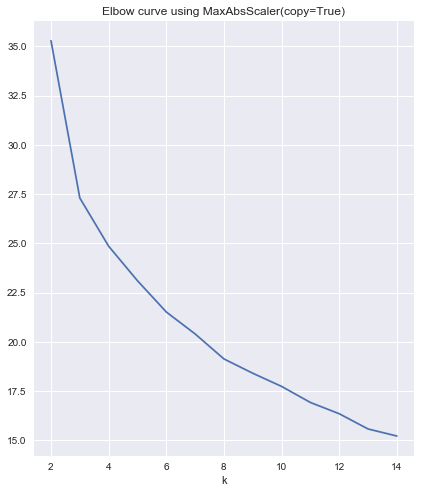

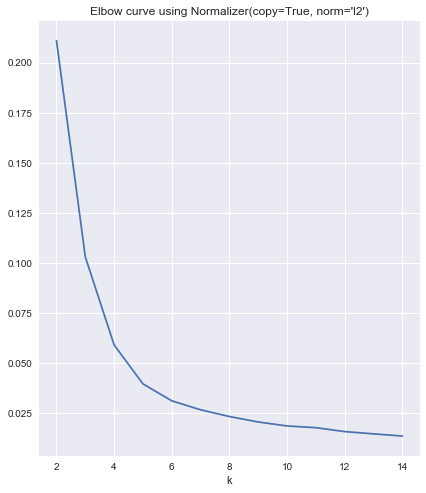

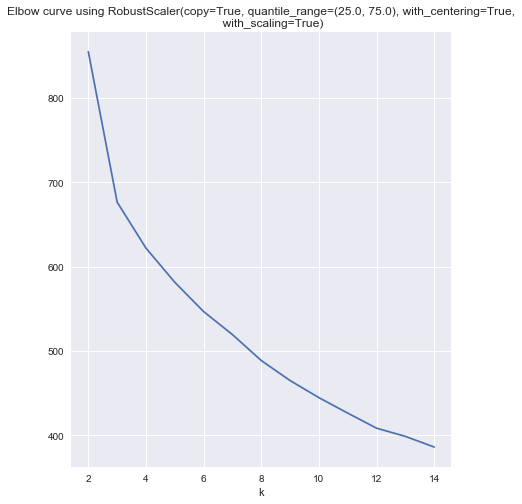

In [17]:
# Elbow Plot
from sklearn.preprocessing import MaxAbsScaler, Normalizer, StandardScaler, RobustScaler
X = wine

stscl = StandardScaler()
maxabs = MaxAbsScaler()
norml= Normalizer()
rscale= RobustScaler()

scalars = [stscl, maxabs, norml, rscale]
num_k = list(range(2,15))

# Calculate SSE for different K
for scalar in scalars:   
    distorsions = []
    for num in num_k:
        
        test=scalar.fit_transform(X)
        test2 = KMeans(n_clusters=num, random_state=10).fit(test)
        distorsions.append(test2.inertia_)
    # Plot values of SSE
    plt.figure(figsize=(15,8))
    plt.subplot(121, title=f'Elbow curve using {scalar}')
    plt.xlabel('k')
    plt.plot(range(2, 15), distorsions)
    plt.grid(True)

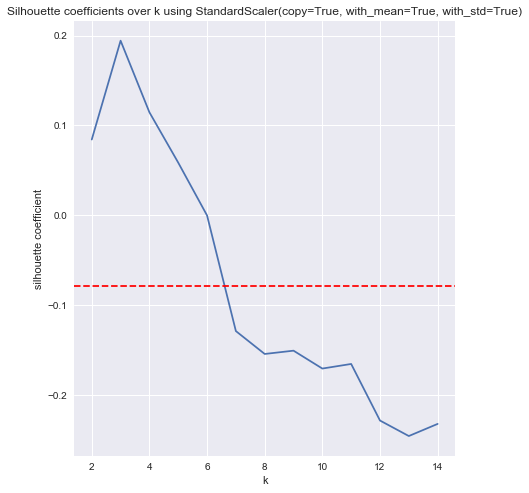

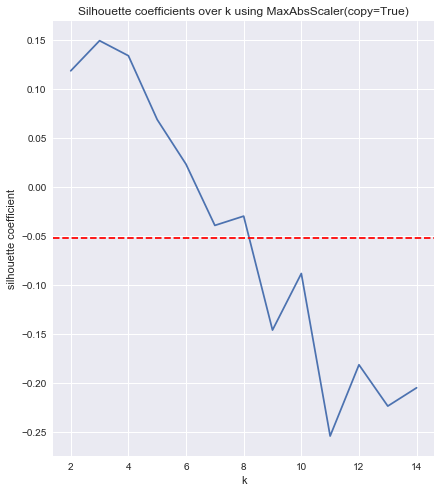

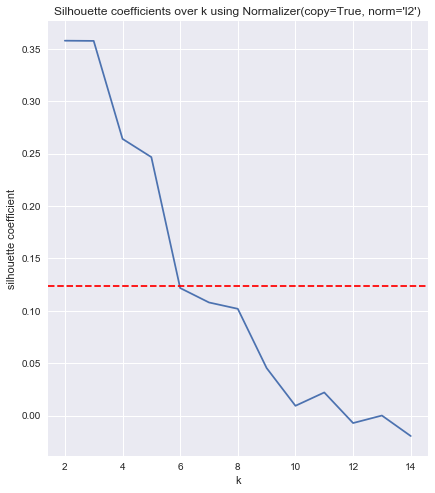

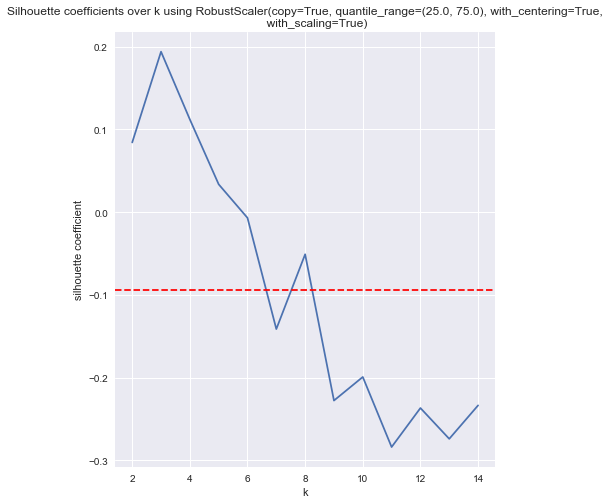

In [18]:
# Silohuette coefficient

# Calculate SSE for different K
for scalar in scalars:   
    silhouette_plot = []
    for num in num_k:
        
        test=scalar.fit_transform(X)
        #test2 = KMeans(n_clusters=num).fit(test)
        clusters = KMeans(n_clusters=num, random_state=10)
        cluster_labels = clusters.fit_predict(test)
        silhouette_avg = metrics.silhouette_score(X, cluster_labels)
        silhouette_plot.append(silhouette_avg)

    # Plot Silhouette coefficient
    plt.figure(figsize=(15,8))
    plt.subplot(121, title=f'Silhouette coefficients over k using {scalar}')
    plt.xlabel('k')
    plt.ylabel('silhouette coefficient')
    plt.plot(range(2, 15), silhouette_plot)
    plt.axhline(y=np.mean(silhouette_plot), color="red", linestyle="--")
    plt.grid(True)

### How many clusters fit the data?

What can you tell me about them?

## One last example

Using online retail data data from [UCI database](https://archive.ics.uci.edu/ml/datasets/online+retail).

You are looking for patterns so you can get people to buy more, more frequently. 
You might have to create some new variables.
![shopping](https://images.pexels.com/photos/50987/money-card-business-credit-card-50987.jpeg?auto=format%2Ccompress&cs=tinysrgb&dpr=2&h=750&w=1260)

In [19]:
shopping = pd.read_excel('Online Retail.xlsx')

In [20]:
shopping.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


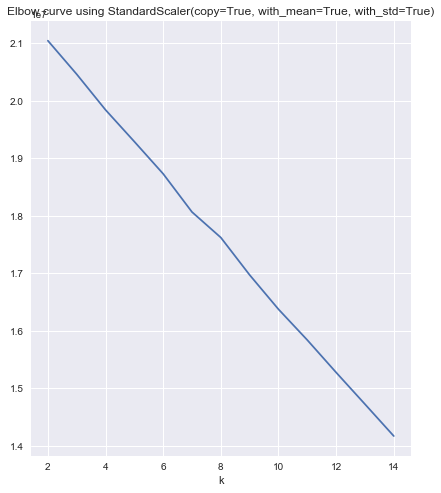

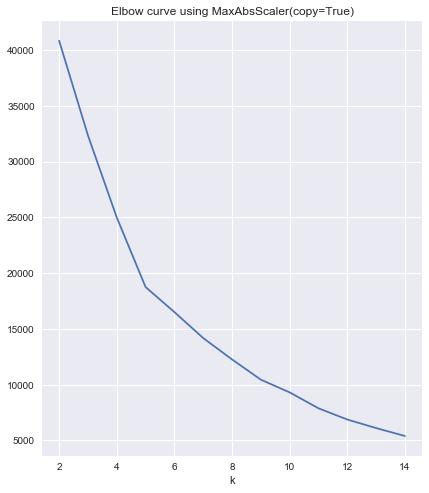

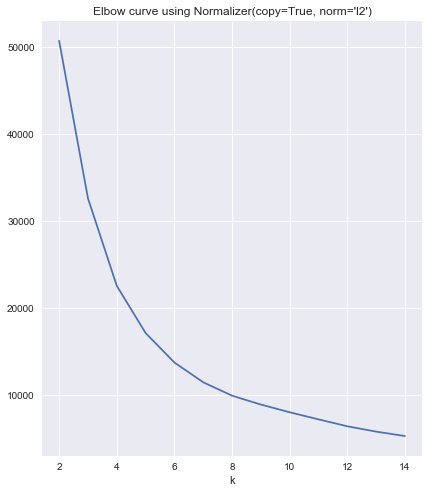

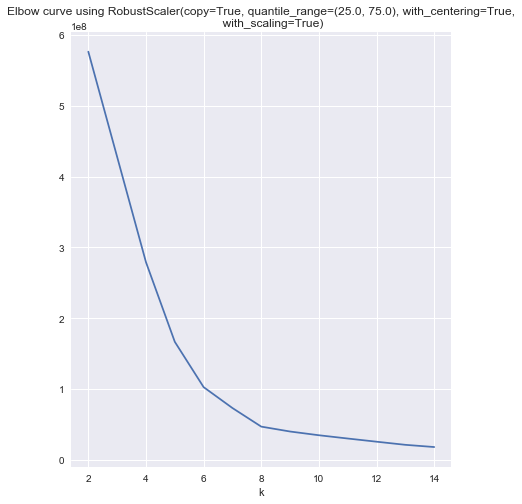

In [23]:
stscl = StandardScaler()
maxabs = MaxAbsScaler()
norml= Normalizer()
rscale= RobustScaler()

scalars = [stscl, maxabs, norml, rscale]
num_k = list(range(2,15))

X = pd.get_dummies(shopping[['Quantity', 'UnitPrice', 'Country']])

# Calculate SSE for different K
for scalar in scalars:   
    distorsions = []
    for num in num_k:
        
        test=scalar.fit_transform(X)
        test2 = KMeans(n_clusters=num, random_state=10).fit(test)
        distorsions.append(test2.inertia_)
    # Plot values of SSE
    plt.figure(figsize=(15,8))
    plt.subplot(121, title=f'Elbow curve using {scalar}')
    plt.xlabel('k')
    plt.plot(range(2, 15), distorsions)
    plt.grid(True)

In [24]:
shopping['Cluster'] = KMeans(n_clusters=5).fit_predict(X)
shopping.Cluster.value_counts()

0    541862
3        42
2         2
1         2
4         1
Name: Cluster, dtype: int64

Note how the Clusters are highly imbalanced here. This clearly has numerous problems and does not seem to produce any natural or informative groupings.

In [26]:
shopping.describe()

,Quantity,UnitPrice,CustomerID,Cluster
count,541909.000000,541909.000000,406829.000000,541909.000000
mean,9.552250,4.611114,15287.690570,0.000251
std,218.081158,96.759853,1713.600303,0.027303
min,-80995.000000,-11062.060000,12346.000000,0.000000
25%,1.000000,1.250000,13953.000000,0.000000
50%,3.000000,2.080000,15152.000000,0.000000
75%,10.000000,4.130000,16791.000000,0.000000
max,80995.000000,38970.000000,18287.000000,4.000000


In [28]:
shopping.groupby('Cluster')[['Quantity', 'UnitPrice']].describe()

Quantity                                                        \
            count          mean          std      min      25%      50%   
Cluster                                                                   
0        541862.0      9.553130    54.959179  -9600.0      1.0      3.0   
1             2.0 -77605.000000  4794.183976 -80995.0 -79300.0 -77605.0   
2             2.0  77605.000000  4794.183976  74215.0  75910.0  77605.0   
3            42.0     -0.642857     0.821107     -2.0     -1.0     -1.0   
4             1.0     -1.000000          NaN     -1.0     -1.0     -1.0   

                          UnitPrice                                       \
             75%      max     count          mean          std       min   
Cluster                                                                    
0           10.0  12540.0  541862.0      3.959810    33.031578 -11062.06   
1       -75910.0 -74215.0       2.0      1.560000     0.735391      1.04   
2        79300.0  80995.0       2.0      1.560000     0.735391      1.04   
3           -1.0      1.0      42.0   7479.926905  3878.881155   3949.32   
4           -1.0     -1.0       1.0  38970.000000          NaN  38970.00   

                                                  
              25%        50%       75%       max  
Cluster                                           
0            1.25      2.080      4.13   3155.95  
1            1.30      1.560      1.82      2.08  
2            1.30      1.560      1.82      2.08  
3         4544.59   5909.875   8142.75  17836.46  
4        38970.00  38970.000  38970.00  38970.00

Further inspection also unveils that Clusters 1 through 4 appear to be populated with returns and other invoices with negative quantities.

In [30]:
shopping[shopping.Quantity<0].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cluster
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,0
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,0
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,0
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,0
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,0


Overall, an effective product clustering will depend on the underlying goal such as recommending new products to customers. However, such an ask might better be served with more simple filtering, such as what products did other customers also buy.

### Code for generating silhouette scores

In [ ]:
for clus_num in [2,3,4,5,6]:
    kmeans = KMeans(n_clusters=clus_num, random_state = 301)
    kmeans_labels = kmeans.fit_predict(X)
    silhouette_plot(clus_num, kmeans_labels, X)